In [1]:
import sqlite3
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()
print("make a test...")

cursor=c.execute("select attraction, name, count(visitorID) as cnt from checkin as ch, attraction as att where ch.type='actual' and ch.attraction=att.AttractionID group by ch.attraction order by cnt desc limit 1;")
for row in cursor:
    print("The most popular attraction to visit in the park is '{0}''.".format(row[1]))
    print("The number of visiting is '{0}'".format(row[2]))

The most popular attraction to visit in the park is 'Ichthyoroberts Rapids''.
The number of visiting is '25009'


In [157]:
cursor2=c.execute("select ch.attraction,at.name,avg(substr(duration,0,2)*3600+substr(duration,3,2)*60+substr(duration,6,2)) as time from checkin as ch, attraction as at where ch.type='actual' and duration not NULL and ch.attraction=at.AttractionID and at.Category GLOB '*Rides*' group by ch.attraction order by time desc limit 1;")
for row in cursor2:
    print("The ride '{0}' has the longest visit time.".format(row[1]))
    print("Its average visit time is '{0}' seconds".format(row[2]))


The ride 'TerrorSaur' has the longest visit time.
Its average visit time is '2747.060654484819'


In [158]:
cursor3=c.execute("select ch.type,count(visitorID) as cnt,att.name from checkin as ch,attraction as att where ch.attraction=att.AttractionID and att.type='Fast Food' group by att.AttractionID order by cnt limit 1;")
for row in cursor3:
    print("The Fast Food offering '{0}' has the fewest visitors.".format(row[2]))
    print("Its number of visitors is {0}.".format(row[1]))

The Fast Food offering 'Theresaur Food Stop' has the fewest visitors.
Its number of visitors is 1116.


All the rides appear in the Skyline are 'North Line','Flying TyrAndrienkos','Enchanted Toadstools','Stone Cups','Dykesadactyl Thrill' and 'Atmosfear'.


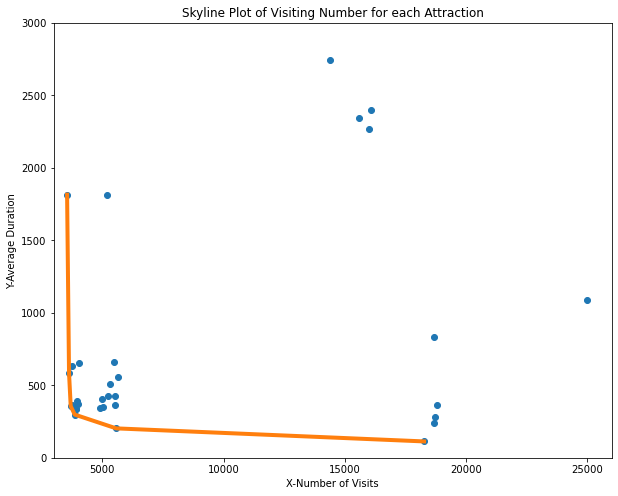

In [24]:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt
import numpy as np

cursor4=c.execute("select count(timestamp) count,avg(substr(duration,0,2)*3600+substr(duration,3,2)*60+substr(duration,6,2)) duration,attraction,name from checkin as ch,attraction as att where ch.type='actual' and duration not NULL and ch.attraction=att.AttractionID and att.Category GLOB '*Rides*' group by ch.attraction order by duration desc,count desc;")
x_list=[]
y_list=[]
for row in cursor4:
    #print(row)
    x_list.append(row[0])
    y_list.append(row[1])



fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('X-Number of Visits')  # Add an x-label to the axes.
ax.set_ylabel('Y-Average Duration')  # Add a y-label to the axes.
ax.set_title("Skyline Plot of Visiting Number for each Attraction")  # Add a title to the axes.

x, y = np.array([x_list, y_list])

ax.plot(x, y, 'o')
ax.set_xlim(3000, 26000)
ax.set_ylim(0,3000)

# Set useblit=True on most backends for enhanced performance.
cursor = Cursor(ax, useblit=True, color='RED', linewidth=5)
xSquares = [3552,3632,3701,3867,5577,18266]
ySquares = [1815,583,357,298,203,113]
plt.plot(xSquares, ySquares,linewidth=4)

print("All the rides appear in the Skyline are 'North Line','Flying TyrAndrienkos','Enchanted Toadstools','Stone Cups','Dykesadactyl Thrill' and 'Atmosfear'.")

plt.show()